In [1]:
import os

In [2]:
import tensorflow as tf
print(tf.__version__)
#import torchaudio
import sys,os
import pandas as pd
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt
import librosa
import librosa.display
import re

from sklearn.preprocessing import LabelEncoder
#from keras.utils import to_categorical

# models
from sklearn import linear_model, naive_bayes, neighbors
#from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from keras.models import Sequential
#from keras.optimizers import Adam
#from keras.utils import np_utils
from sklearn import metrics 
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D


2.6.2


In [3]:
from scipy import stats

# Libraries for the evaluation
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
%matplotlib inline

In [6]:
labels = pd.DataFrame(columns=['speaker_id1', 'gender'])

f = open("E:/Libri/LibriSpeech/SPEAKERS.txt", "r", encoding="UTF8").readlines()
i = 0
for idx, line in enumerate(f):
    if idx > 11:
        parsed = re.split('\s+',line)
        if parsed[4] == 'train-clean-100':
            labels.loc[i] = parsed[0], parsed[2] # speaker_id and label (M/F)
            i += 1   

In [10]:
root = "E:/Libri/LibriSpeech/train-clean-100/"
df = pd.DataFrame(columns=['gender'])                 
file_path = []

i = 0

# loading the features in the first dataframe
for path, subdirs, files in os.walk(root):
    for name in files:
        gender = path.split('/')[4]
        if name.endswith(".flac"):
            file_path.append(path + '/' + name)
            df.loc[i] = [gender]
            i += 1

In [11]:
df = pd.concat([pd.DataFrame(file_path, columns = ['path']),df],axis=1)
df

,path,gender
0,E:/Libri/LibriSpeech/train-clean-100/103/103-1...,103
1,E:/Libri/LibriSpeech/train-clean-100/103/103-1...,103
2,E:/Libri/LibriSpeech/train-clean-100/103/103-1...,103
3,E:/Libri/LibriSpeech/train-clean-100/103/103-1...,103
4,E:/Libri/LibriSpeech/train-clean-100/103/103-1...,103
...,...,...
28533,E:/Libri/LibriSpeech/train-clean-100/911/911-1...,911
28534,E:/Libri/LibriSpeech/train-clean-100/911/911-1...,911
28535,E:/Libri/LibriSpeech/train-clean-100/911/911-1...,911
28536,E:/Libri/LibriSpeech/train-clean-100/911/911-1...,911


In [12]:
df.to_csv('E:/Libri/speaker_id.csv')

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler as sd
from sklearn.model_selection import train_test_split
model = Sequential()

In [13]:
data=pd.read_csv('E:/Libri/mfcc_train_speaker.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Speaker_ID
0,-379.455688,97.028137,-36.862133,58.326141,-14.381740,18.083685,-13.535484,-1.980425,6.867363,-1.436182,...,6.590969,4.147519,2.915069,2.506089,2.704373,0.896116,0.402769,-2.776433,-0.392300,103
1,-350.678436,104.953583,-50.797516,63.575645,-20.301023,16.125052,-18.338022,-4.701718,5.564232,-3.718176,...,5.044738,4.084303,2.290769,1.581125,2.657886,1.554843,2.869262,-0.345722,1.761455,103
2,-338.924103,103.865723,-51.616165,55.547260,-14.175528,12.698159,-15.529408,-6.788486,6.311726,-1.932351,...,5.090059,3.858420,1.970551,1.166767,4.533372,2.390000,2.891569,-0.540090,-0.186476,103
3,-346.993133,103.250298,-46.157928,55.580742,-14.027334,6.038419,-17.537346,-1.607846,10.737667,-4.196127,...,3.346047,2.461340,2.484034,3.027887,4.524765,2.431338,2.143259,-1.152794,-0.398699,103
4,-350.193420,107.248901,-42.734859,57.279823,-20.294600,7.000971,-20.205288,0.712615,8.332971,-5.744866,...,4.356198,5.268185,3.117359,2.990666,4.309646,1.087925,3.075779,-1.321528,-0.485248,103


In [41]:
#data.speaker_id.value_counts()

In [14]:
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [55]:
z=data[0:1000]
z

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Speaker_ID
0,-379.455688,97.028137,-36.862133,58.326141,-14.381740,18.083685,-13.535484,-1.980425,6.867363,-1.436182,...,6.590969,4.147519,2.915069,2.506089,2.704373,0.896116,0.402769,-2.776433,-0.392300,103
1,-350.678436,104.953583,-50.797516,63.575645,-20.301023,16.125052,-18.338022,-4.701718,5.564232,-3.718176,...,5.044738,4.084303,2.290769,1.581125,2.657886,1.554843,2.869262,-0.345722,1.761455,103
2,-338.924103,103.865723,-51.616165,55.547260,-14.175528,12.698159,-15.529408,-6.788486,6.311726,-1.932351,...,5.090059,3.858420,1.970551,1.166767,4.533372,2.390000,2.891569,-0.540090,-0.186476,103
3,-346.993133,103.250298,-46.157928,55.580742,-14.027334,6.038419,-17.537346,-1.607846,10.737667,-4.196127,...,3.346047,2.461340,2.484034,3.027887,4.524765,2.431338,2.143259,-1.152794,-0.398699,103
4,-350.193420,107.248901,-42.734859,57.279823,-20.294600,7.000971,-20.205288,0.712615,8.332971,-5.744866,...,4.356198,5.268185,3.117359,2.990666,4.309646,1.087925,3.075779,-1.321528,-0.485248,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-332.210236,85.976257,-48.348248,69.380257,-40.846989,16.268087,-18.902851,4.667327,-1.255777,-9.278911,...,0.714280,3.771701,3.293021,6.363577,5.758886,5.278218,5.895327,2.725751,5.918876,1183
996,-357.773712,71.274269,-42.503311,60.584373,-35.303238,17.293619,-15.609378,6.867744,1.937046,-5.049085,...,1.855946,4.151828,2.450951,4.508115,3.960655,2.327166,2.475070,1.046758,2.496841,1183
997,-303.967895,64.737312,-54.952255,74.819206,-51.354740,35.492699,-36.256485,17.553371,-2.504867,-4.041581,...,2.237770,7.552730,2.001996,5.793243,4.450655,4.712308,2.914915,1.277921,2.879731,1183
998,-300.962677,79.510307,-63.190033,59.666374,-51.259167,22.471220,-22.510559,6.808994,1.763889,-3.140162,...,3.221693,5.219234,1.889757,4.121166,5.279699,4.933600,5.336883,2.102623,3.682725,1183


In [56]:
a = z.iloc[:, 0:-1]
b = z.iloc[:, -1]

In [57]:
a.shape, b.shape

((1000, 40), (1000,))

In [58]:
a = np.array(a)
b = np.array(b)
a = a[:,:,np.newaxis]

In [59]:
a.shape, b.shape

((1000, 40, 1), (1000,))

In [22]:
y.shape

(28538,)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=0)

In [27]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,shuffle=True,random_state=0)

In [28]:
y_train1 = np.array(y_train1)
y_test1 = np.array(y_test1)

In [29]:
y_train1.shape

(22830,)

In [30]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [31]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22830, 40), (22830,), (5708, 40), (5708,))

In [32]:
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]

from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
le = LabelEncoder()
y_train = to_categorical(le.fit_transform(y_train)) 
y_test = to_categorical(le.fit_transform(y_test)) 

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((22830, 40, 1), (22830, 251), (5708, 40, 1), (5708, 251))

In [33]:
y_train.shape[1]

251

In [34]:
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Layer, Input
from keras import Sequential, Model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv1D,Activation,GRU,Bidirectional,BatchNormalization,Attention
from tensorflow.keras.layers import MaxPooling1D,GlobalAveragePooling1D, GlobalMaxPooling1D,concatenate
from keras.layers import Layer, Input, Conv1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GlobalMaxPooling1D, Flatten
import tensorflow as tf 

sequence_input= Input(shape=(40,1), dtype='float32')
a=Conv1D(filters=32, kernel_size=7, padding='same', activation='relu')(sequence_input)
a=BatchNormalization()(a)
a=MaxPooling1D(pool_size=2)(a)
#x=Dropout(0.3)(x)
c=Conv1D(filters=64, kernel_size=9, padding='same', activation='relu')(a)
c=BatchNormalization()(c)
c=MaxPooling1D(pool_size=2)(c)
c=Conv1D(filters=128, kernel_size=7, padding='same', activation='relu')(c)
c=BatchNormalization()(c)
c=MaxPooling1D(pool_size=2)(c)
#c=Conv1D(filters=128, kernel_size=5, padding='same', activation='relu')(c)
#c=BatchNormalization()(c)
#c=GlobalAveragePooling1D()(c)
#c=Dropout(0.3)(c)
d=Bidirectional(GRU(units=128,return_sequences=True))(c)
#d=Dropout(0.2)(d)
#d=Bidirectional(GRU(units=64,return_sequences=True))(d)

d=GlobalAveragePooling1D()(d)
e = Dense(256, activation='relu')(d)
outp=Dense(units=251, activation='softmax')(e)
model= Model(sequence_input,outp) 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40, 1)]           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 40, 32)            256       
_________________________________________________________________
batch_normalization (BatchNo (None, 40, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 20, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 20, 64)            18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 64)            0     

In [35]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

In [36]:
epochs = 50
learning_rate = 0.0001
optimizer=keras.optimizers.Adam(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

C:\Users\CET_Pc\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [37]:
history = model.fit(x_train, y_train,batch_size=32,epochs=epochs,verbose=1,shuffle=True,validation_data=(x_test, y_test),callbacks=[es])        


Epoch 1/100
714/714 [==============================] - 14s 14ms/step - loss: 3.8270 - accuracy: 0.2940 - val_loss: 2.1509 - val_accuracy: 0.6421
Epoch 2/100
714/714 [==============================] - 9s 13ms/step - loss: 1.3379 - accuracy: 0.7955 - val_loss: 0.7855 - val_accuracy: 0.8858
Epoch 3/100
714/714 [==============================] - 9s 13ms/step - loss: 0.5753 - accuracy: 0.9165 - val_loss: 0.3926 - val_accuracy: 0.9404
Epoch 4/100
714/714 [==============================] - 9s 13ms/step - loss: 0.3086 - accuracy: 0.9580 - val_loss: 0.2225 - val_accuracy: 0.9702
Epoch 5/100
714/714 [==============================] - 10s 13ms/step - loss: 0.1951 - accuracy: 0.9730 - val_loss: 0.1676 - val_accuracy: 0.9755
Epoch 6/100
714/714 [==============================] - 10s 13ms/step - loss: 0.1317 - accuracy: 0.9818 - val_loss: 0.1377 - val_accuracy: 0.9769
Epoch 7/100
714/714 [==============================] - 10s 13ms/step - loss: 0.0935 - accuracy: 0.9877 - val_loss: 0.0989 - val_accur

714/714 [==============================] - 9s 13ms/step - loss: 0.0099 - accuracy: 0.9975 - val_loss: 0.0281 - val_accuracy: 0.9930
Epoch 58/100
714/714 [==============================] - 9s 13ms/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0264 - val_accuracy: 0.9932
Epoch 00058: early stopping


In [38]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])  

Test loss: 0.026371123269200325
Test accuracy: 0.9931674599647522


C:\Users\CET_Pc\Anaconda3\envs\tensor\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


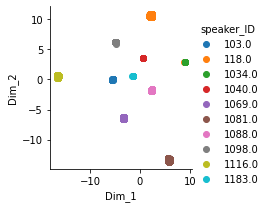

In [60]:
from sklearn.manifold import TSNE
import seaborn as sn
tsne_data = model.predict(a)
tsne_data = TSNE(n_components=2, perplexity=150).fit_transform(tsne_data)
import matplotlib.pyplot as pltt

#tsne_data = model1.fit_transform(x_train1) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, b)).T
tsne_df = pd.DataFrame(tsne_data, columns=("Dim_1", "Dim_2", "speaker_ID"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="speaker_ID", size=3).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
#plt.title('With perplexity = 200')
plt.show()